In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
b = 1000

X = torch.arange(1, 1001, 1)  # Creates a tensor [0, 1, ..., 99]
y_list = []  # Create an empty list to store the values
random_list = []

for input in X:
    random_scale = 0.7 + torch.rand(1) * 0.3  # Generate a random scale between 0.7 and 0.8
    random_list.append(random_scale)
    y_value = input * random_scale + b
    y_list.append(y_value)

weights = np.mean(random_list)
print(f"weights: {weights},  bias: {b}")
y = torch.tensor(y_list)  

weights: 0.8506444096565247,  bias: 1000


In [3]:
pivot = int(0.8 * len(X))
X_train, y_train = X[:pivot], y[:pivot]
X_test, y_test = X[pivot:], y[pivot:]

In [4]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.scatter(train_data, train_labels, c="b", label="Training graph")
    plt.scatter(test_data, test_labels, c="g", label="Testing graph")

    if predictions is not None:
        print(test_data.shape)
        plt.scatter(test_data, predictions, c="r", label="predictions")


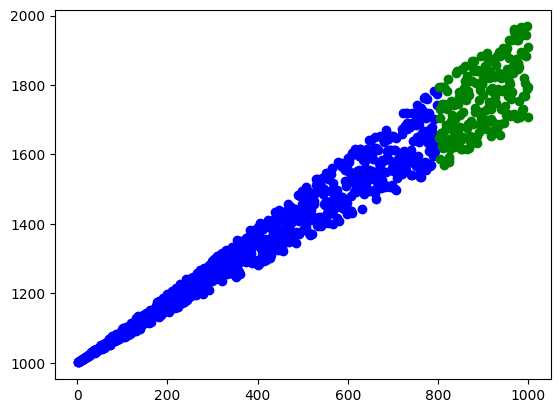

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.bias = torch.nn.Parameter(torch.rand(1), requires_grad=True)
        self.weights = torch.nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, X):
        return self.weights * X + self.bias

In [7]:
model = LinearRegressionModel()

torch.Size([200])
torch.Size([200])


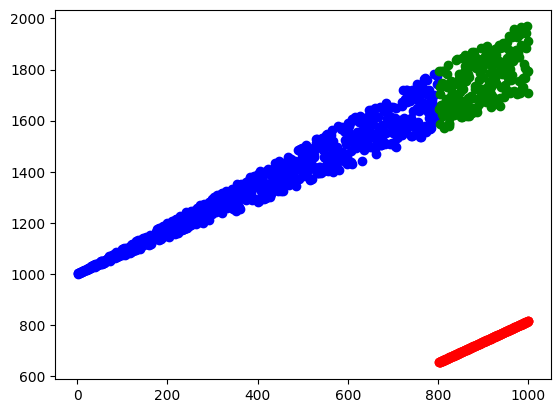

In [8]:
with torch.inference_mode():
    y_preds = model(X_test)
print(y_preds.shape)
plot_predictions(predictions=y_preds)

In [9]:
model.bias

Parameter containing:
tensor([0.0787], requires_grad=True)

In [10]:
model.weights

Parameter containing:
tensor([0.8153], requires_grad=True)

In [11]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Parameter containing:
tensor([0.8493], requires_grad=True) Parameter containing:
tensor([999.5511], requires_grad=True)
torch.Size([200])


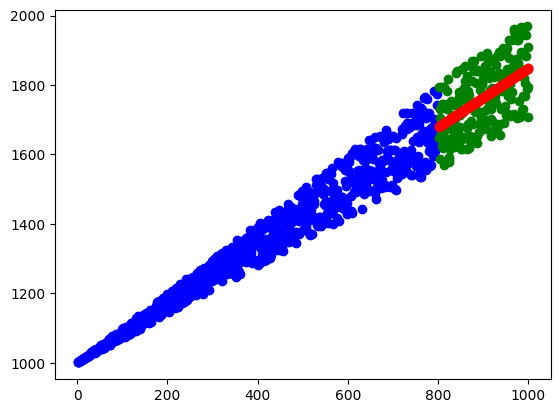

In [40]:
epochs = 10000

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()

    pred = model(X_train)
    loss = loss_fn(y_train, pred)


    loss.backward()
    optimizer.step()

print(model.weights, model.bias)
with torch.inference_mode():
    y_pred = model(X_test)

plot_predictions(predictions=y_pred)


# KEEP RUNNING THIS CELL UNTIL THE RED LINE FITS THE CENTER OF THE GREEN POINT

In [41]:
print(f"Model weight: {model.weights[0].item():.4f} must approximate the weights we used to create the datapoints which is: {weights:.4f}")

Model weight: 0.8493 must approximate the weights we used to create the datapoints which is: 0.8506


In [42]:
print(f"Model weight: {model.bias[0].item():.4f} must approximate the weights we used to create the datapoints which is: {b:.4f}")

Model weight: 999.5511 must approximate the weights we used to create the datapoints which is: 1000.0000
